In [2]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
np.random.seed(10)

In [3]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title= "label="+str(labels[idx])
        if len(prediction)>0:
            title += ",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

In [4]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = mnist.load_data()

In [5]:
x_Train4D=x_train_image.reshape(-1,28,28,1).astype('float32')
x_Test4D=x_test_image.reshape(-1,28,28,1).astype('float32')

In [6]:
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [7]:
y_TrainOneHot=np_utils.to_categorical(y_train_label)
y_TestOneHot=np_utils.to_categorical(y_test_label)

In [9]:
x_Train4D_normalize[0].shape

(28, 28, 1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='SAME',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 36)          14436     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               73856     
__________

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train4D_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 4s - loss: 0.6728 - acc: 0.7850 - val_loss: 0.1252 - val_acc: 0.9629
Epoch 2/10
 - 2s - loss: 0.1778 - acc: 0.9466 - val_loss: 0.0802 - val_acc: 0.9755
Epoch 3/10
 - 2s - loss: 0.1286 - acc: 0.9604 - val_loss: 0.0666 - val_acc: 0.9789
Epoch 4/10
 - 2s - loss: 0.1028 - acc: 0.9691 - val_loss: 0.0539 - val_acc: 0.9838
Epoch 5/10
 - 2s - loss: 0.0867 - acc: 0.9732 - val_loss: 0.0512 - val_acc: 0.9849
Epoch 6/10
 - 2s - loss: 0.0756 - acc: 0.9769 - val_loss: 0.0449 - val_acc: 0.9863
Epoch 7/10
 - 2s - loss: 0.0662 - acc: 0.9802 - val_loss: 0.0398 - val_acc: 0.9882
Epoch 8/10
 - 2s - loss: 0.0602 - acc: 0.9814 - val_loss: 0.0367 - val_acc: 0.9883
Epoch 9/10
 - 2s - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0359 - val_acc: 0.9897
Epoch 10/10
 - 2s - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0334 - val_acc: 0.9901


In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

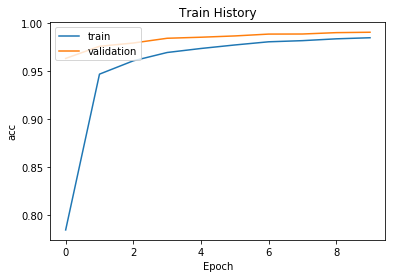

In [18]:
show_train_history(train_history,'acc','val_acc')

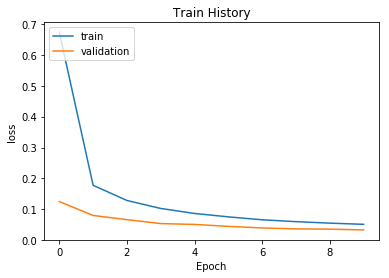

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores=model.evaluate(x_Test4D_normalize,y_TestOneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 63us/step

accuracy= 0.9896


In [21]:
prediction=model.predict_classes(x_Test4D)

In [22]:
to_show_x=x_test_image[y_test_label!=prediction]

In [23]:
to_show_y=y_test_label[y_test_label!=prediction]

In [24]:
to_show_p=prediction[y_test_label!=prediction]

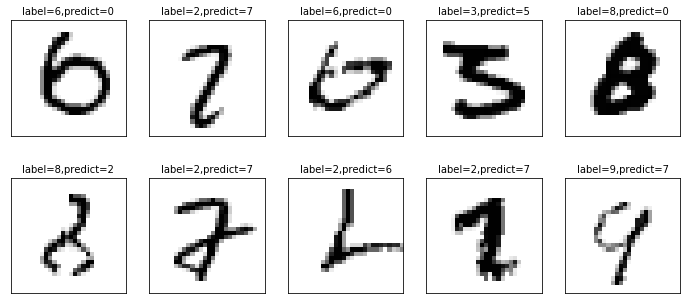

In [25]:
plot_images_labels_prediction(to_show_x,to_show_y,to_show_p,idx=0)

In [26]:
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,0,1,0,0,0,3,1,0,0
1,0,1130,1,0,0,0,1,2,1,0
2,4,0,1022,0,0,0,1,4,1,0
3,0,0,2,998,0,4,0,3,3,0
4,0,0,0,0,981,0,0,0,0,1
5,1,0,0,3,0,885,1,1,1,0
6,7,2,0,0,3,2,942,0,2,0
7,1,1,4,0,0,0,0,1021,1,0
8,4,0,1,0,1,0,0,2,963,3
